In [1]:
!pip install yfinance scikit-learn matplotlib seaborn

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 10 popular stock tickers
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'NFLX', 'META', 'JPM', 'DIS']

# Store all stock data
stock_data = {}

for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start='2019-01-01', end='2024-12-31')
    data.dropna(inplace=True)
    stock_data[ticker] = data


/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3-2565405057.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-12-31')


[*********************100%***********************]  1 of 1 completed


In [4]:
def predict_stock_price(data,ticker):
  print(f"Predicting stock price for {ticker}...")

  df = data.copy()

  df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

  scaler = MinMaxScaler()
  features = ['Open', 'High', 'Low', 'Volume']
  X_scaled = scaler.fit_transform(df[features])
  y= df['Close'].values

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  print(f"✅ RMSE: {rmse:.2f}")
  print(f"✅ R² Score: {r2:.4f}")


  plt.figure(figsize=(12, 5))
  plt.plot(y_test, label='Actual', linewidth=2)
  plt.plot(y_pred, label='Predicted', linestyle='--')
  plt.title(f'{ticker} - Closing Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.grid()
  plt.show()

Predicting stock price for AAPL...
✅ RMSE: 1.03
✅ R² Score: 0.9983


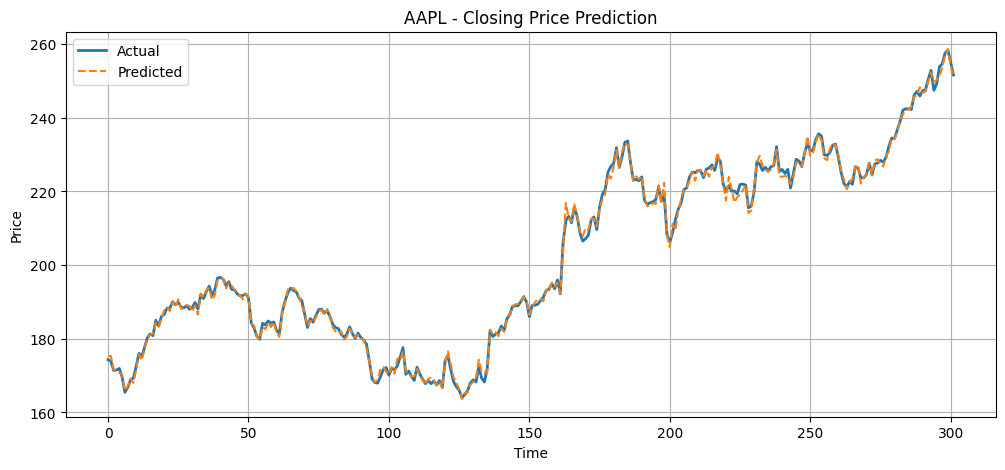

Predicting stock price for GOOGL...
✅ RMSE: 0.90
✅ R² Score: 0.9975


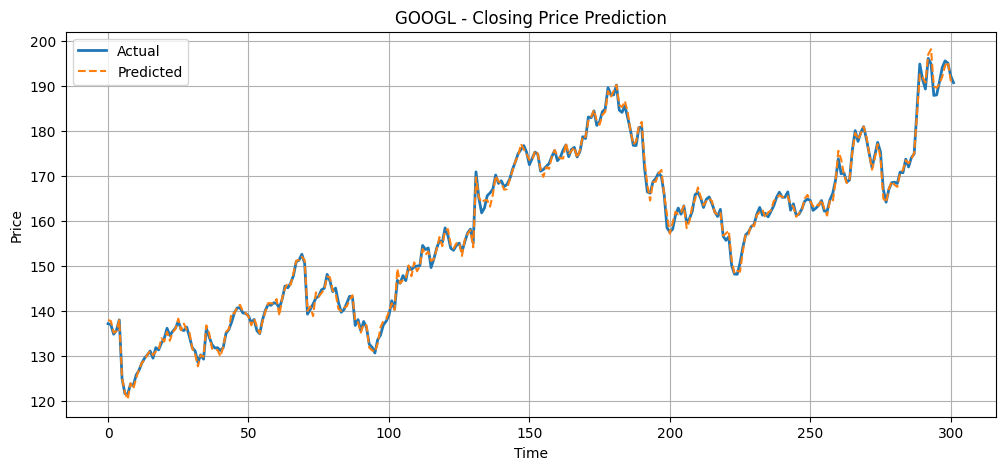

Predicting stock price for MSFT...
✅ RMSE: 1.84
✅ R² Score: 0.9958


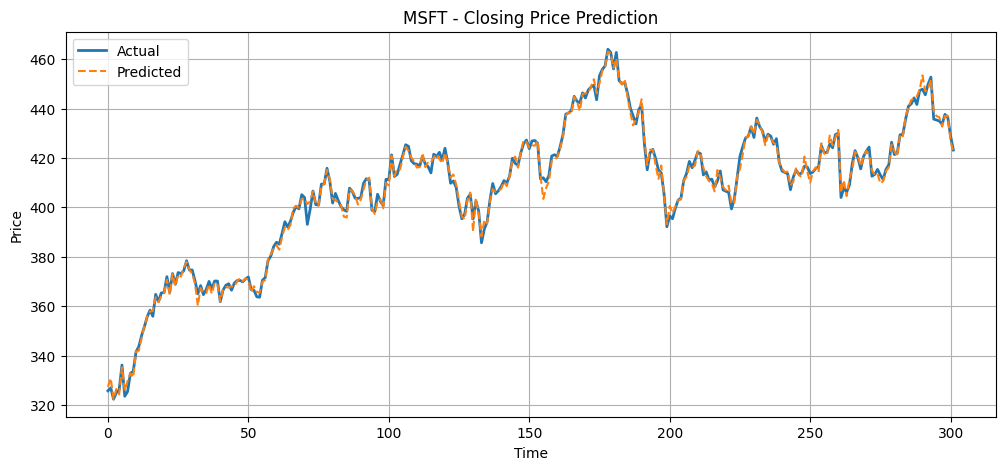

Predicting stock price for AMZN...
✅ RMSE: 1.01
✅ R² Score: 0.9980


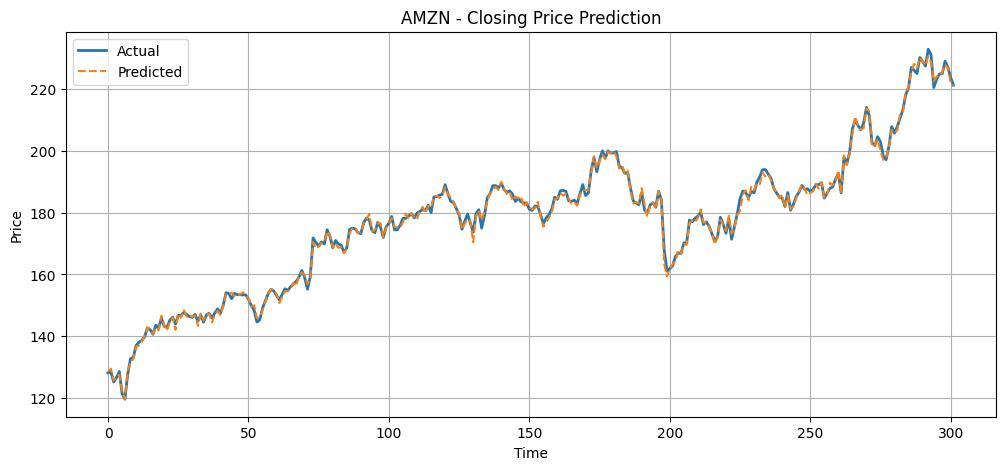

Predicting stock price for TSLA...
✅ RMSE: 2.97
✅ R² Score: 0.9979


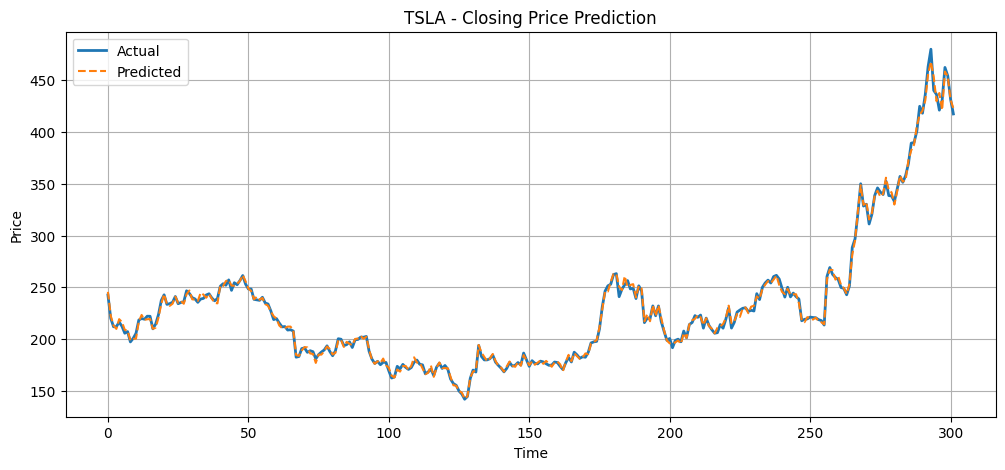

Predicting stock price for NVDA...
✅ RMSE: 1.06
✅ R² Score: 0.9990


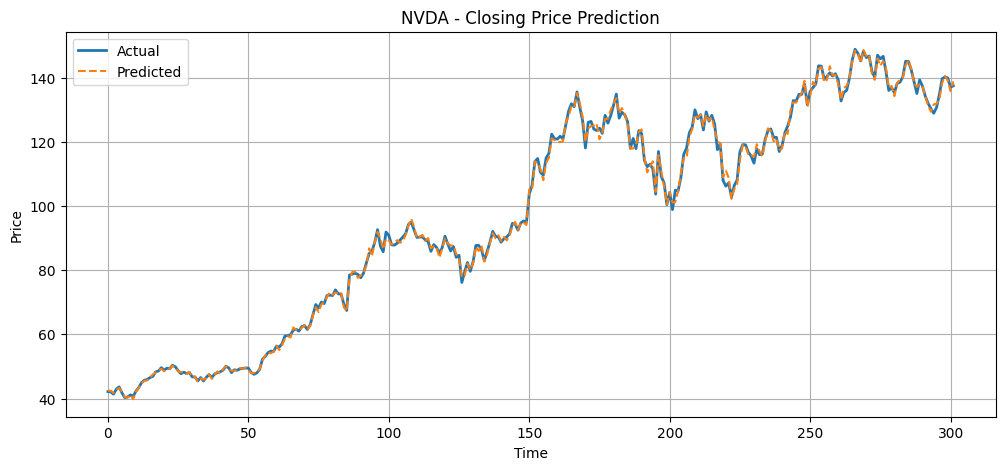

Predicting stock price for NFLX...
✅ RMSE: 3.90
✅ R² Score: 0.9991


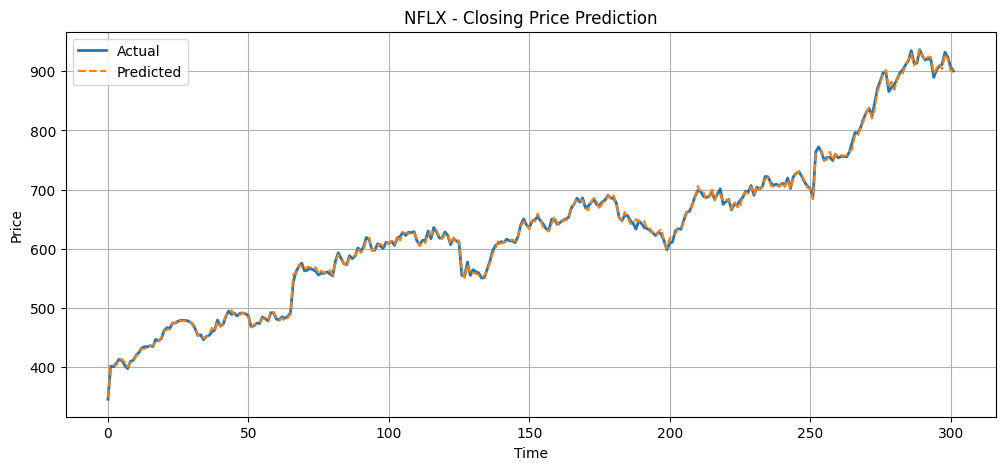

Predicting stock price for META...
✅ RMSE: 3.26
✅ R² Score: 0.9986


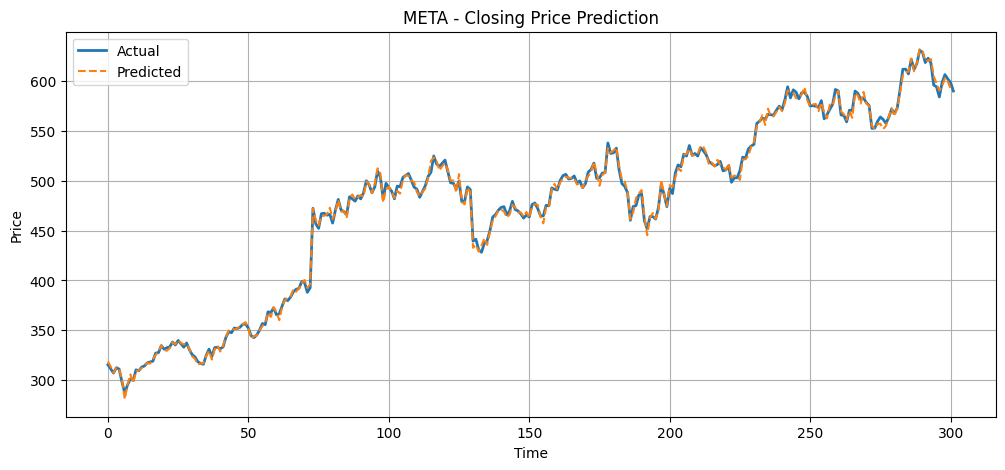

Predicting stock price for JPM...
✅ RMSE: 0.90
✅ R² Score: 0.9990


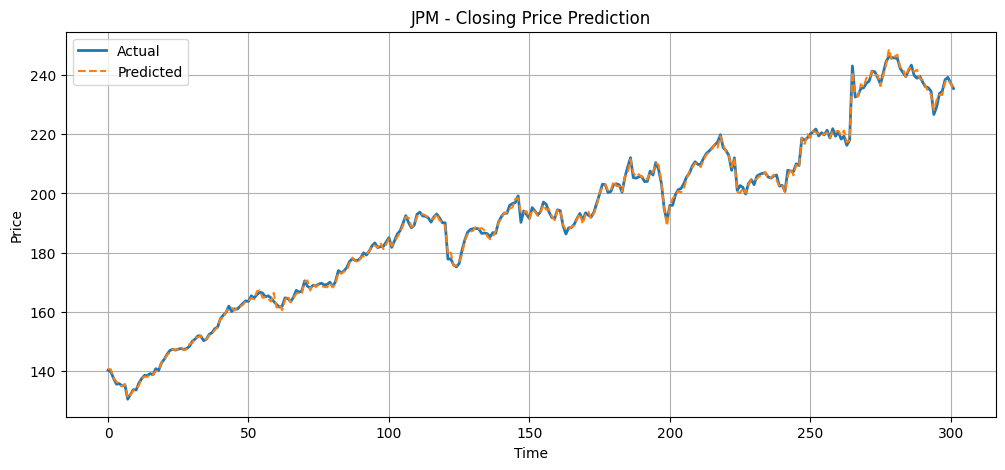

Predicting stock price for DIS...
✅ RMSE: 0.55
✅ R² Score: 0.9972


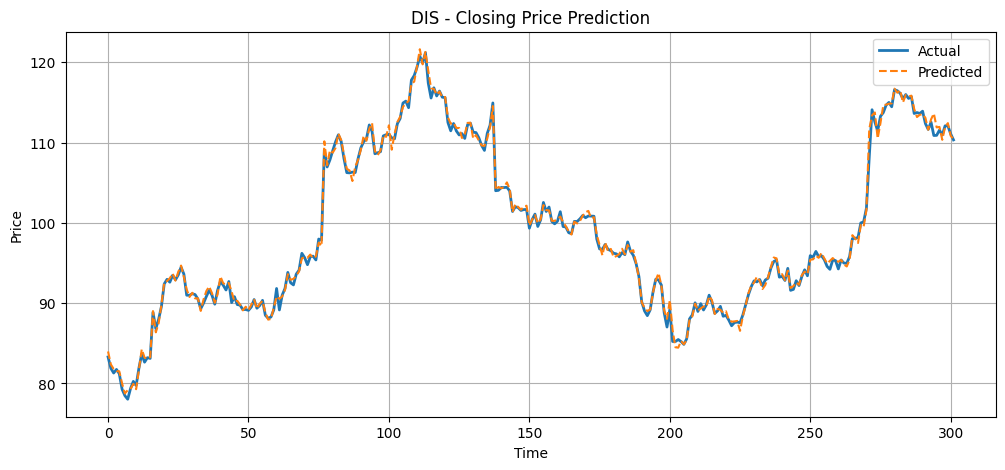

In [5]:
for ticker in tickers:
  predict_stock_price(stock_data[ticker], ticker)